In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [2]:
match =pd.read_csv('matches.csv')
delivery =pd.read_csv('deliveries.csv')

In [3]:
print(match.shape)
match.head()

(756, 18)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.groupby(['match_id','inning']).sum()

batting_team  \
match_id inning                                                      
1        1       Sunrisers HyderabadSunrisers HyderabadSunriser...   
         2       Royal Challengers BangaloreRoyal Challengers B...   
2        1       Mumbai IndiansMumbai IndiansMumbai IndiansMumb...   
         2       Rising Pune SupergiantRising Pune SupergiantRi...   
3        1       Gujarat LionsGujarat LionsGujarat LionsGujarat...   
...                                                            ...   
11413    2       Delhi CapitalsDelhi CapitalsDelhi CapitalsDelh...   
11414    1       Delhi CapitalsDelhi CapitalsDelhi CapitalsDelh...   
         2       Chennai Super KingsChennai Super KingsChennai ...   
11415    1       Mumbai IndiansMumbai IndiansMumbai IndiansMumb...   
         2       Chennai Super KingsChennai Super KingsChennai ...   

                                                      bowling_team  over  \
match_id inning                                                            
1        1       Royal Challengers BangaloreRoyal Challengers B...  1312   
         2       Sunrisers HyderabadSunrisers HyderabadSunriser...  1259   
2        1       Rising Pune SupergiantRising Pune SupergiantRi...  1323   
         2       Mumbai IndiansMumbai IndiansMumbai IndiansMumb...  1270   
3        1       Kolkata Knight RidersKolkata Knight RidersKolk...  1280   
...                                                            ...   ...   
11413    2       Sunrisers HyderabadSunrisers HyderabadSunriser...  1301   
11414    1       Chennai Super KingsChennai Super KingsChennai ...  1294   
         2       Delhi CapitalsDelhi CapitalsDelhi CapitalsDelh...  1160   
11415    1       Chennai Super KingsChennai Super KingsChennai ...  1287   
         2       Mumbai IndiansMumbai IndiansMumbai IndiansMumb...  1295   

                 ball                                            batsman  \
match_id inning                                                            
1        1        456  DA WarnerDA WarnerDA WarnerDA WarnerDA WarnerS...   
         2        444  CH GayleMandeep SinghMandeep SinghMandeep Sing...   
2        1        455  PA PatelPA PatelPA PatelJC ButtlerPA PatelPA P...   
         2        435  AM RahaneMA AgarwalMA AgarwalMA AgarwalAM Raha...   
3        1        434  JJ RoyJJ RoyJJ RoyJJ RoyJJ RoyJJ RoyBB McCullu...   
...               ...                                                ...   
11413    2        448  P ShawP ShawS DhawanS DhawanS DhawanP ShawS Dh...   
11414    1        441  P ShawP ShawP ShawP ShawP ShawS DhawanP ShawS ...   
         2        413  F du PlessisF du PlessisF du PlessisSR WatsonS...   
11415    1        447  Q de KockRG SharmaQ de KockQ de KockQ de KockQ...   
         2        448  F du PlessisF du PlessisF du PlessisF du Pless...   

                                                       non_striker  \
match_id inning                                                      
1        1       S DhawanS DhawanS DhawanS DhawanS DhawanDA War...   
         2       Mandeep SinghCH GayleCH GayleCH GayleCH GayleC...   
2        1       JC ButtlerJC ButtlerJC ButtlerPA PatelJC Buttl...   
         2       MA AgarwalAM RahaneAM RahaneAM RahaneMA Agarwa...   
3        1       BB McCullumBB McCullumBB McCullumBB McCullumBB...   
...                                                            ...   
11413    2       S DhawanS DhawanP ShawP ShawP ShawS DhawanP Sh...   
11414    1       S DhawanS DhawanS DhawanS DhawanS DhawanP Shaw...   
         2       SR WatsonSR WatsonSR WatsonF du PlessisF du Pl...   
11415    1       RG SharmaQ de KockRG SharmaRG SharmaRG SharmaR...   
         2       SR WatsonSR WatsonSR WatsonSR WatsonF du Pless...   

                                                            bowler  \
match_id inning                                                      
1        1       TS MillsTS MillsTS MillsTS MillsTS MillsTS Mil...   
         2       A NehraA NehraA NehraA Nehr

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
delivery.shape

(179078, 21)

In [7]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [8]:
total_score_df=total_score_df[total_score_df['inning']==2]

In [9]:
(total_score_df)

,match_id,inning,total_runs
1,1,2,172
3,2,2,187
5,3,2,184
7,4,2,164
9,5,2,142
...,...,...,...
1519,11347,2,137
1521,11412,2,140
1523,11413,2,170
1525,11414,2,162


In [10]:
total_score_df

,match_id,inning,total_runs
1,1,2,172
3,2,2,187
5,3,2,184
7,4,2,164
9,5,2,142
...,...,...,...
1519,11347,2,137
1521,11412,2,140
1523,11413,2,170
1525,11414,2,162


In [11]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,137
750,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,140
751,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,170
752,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,162


In [12]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
  teams=['Sunrisers Hyderabad',
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals']

In [14]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')


In [15]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [16]:
match_df.shape

(640, 20)

In [17]:
match_df['dl_applied'].value_counts()

dl_applied
0    625
1     15
Name: count, dtype: int64

In [18]:
match_df=match_df[match_df['dl_applied']==0]
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,142
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,180
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,150
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,137
750,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,140
751,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,170
752,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,162


In [19]:
match_df=match_df[['match_id','city','winner','total_runs']]
match_df


,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,172
4,5,Bangalore,Royal Challengers Bangalore,142
6,7,Mumbai,Mumbai Indians,180
7,8,Indore,Kings XI Punjab,150
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
749,11347,Mumbai,Mumbai Indians,137
750,11412,Chennai,Mumbai Indians,140
751,11413,Visakhapatnam,Delhi Capitals,170
752,11414,Visakhapatnam,Chennai Super Kings,162


In [20]:
delivery_df=match_df.merge(delivery,on='match_id')
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149445,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149446,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149447,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149448,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [21]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [22]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [23]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [24]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,171,119
126,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,171,118
127,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,171,117
128,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,169,116
129,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,165,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149445,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,5,4
149446,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,3,3
149447,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,2,2
149448,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,0,1


In [25]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,171,119,10
126,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,171,118,10
127,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,171,117,10
128,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,169,116,10
129,1,Hyderabad,Sunrisers Hyderabad,172,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,165,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149445,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,5,4,5
149446,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,3,3,5
149447,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,2,2,4
149448,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,0,1,4


In [26]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [27]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [28]:
def result(row):
    return 1 if row['batting_team'] == row['winner']else 0

In [29]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [30]:
final_df = delivery_df[['batting_team',
                        'bowling_team',
                        'city',
                        'runs_left',
                        'balls_left',
                        'wickets',
                        'total_runs_x',
                        'crr',
                        'rrr',
                        'result']]

In [31]:
final_df = final_df.sample(final_df.shape[0])

In [32]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
63721,Kolkata Knight Riders,Deccan Chargers,Cuttack,71,70,8,127,6.72,6.085714,1


In [33]:
final_df = final_df.copy()
final_df.dropna(inplace=True)

In [34]:
final_df = final_df[final_df['balls_left'] != 0]

In [35]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
121009,Kolkata Knight Riders,Sunrisers Hyderabad,Delhi,107,99,9,140,9.428571,6.484848
44440,Royal Challengers Bangalore,Deccan Chargers,Nagpur,87,74,9,138,6.652174,7.054054
21849,Kolkata Knight Riders,Rajasthan Royals,Cape Town,17,14,5,150,7.528302,7.285714
44165,Rajasthan Royals,Mumbai Indians,Jaipur,125,100,7,137,3.600000,7.500000
139495,Kings XI Punjab,Chennai Super Kings,Chennai,42,39,8,142,7.407407,6.461538
...,...,...,...,...,...,...,...,...,...
32111,Kings XI Punjab,Chennai Super Kings,Durban,1,2,2,92,4.627119,3.000000
36114,Kings XI Punjab,Deccan Chargers,Cuttack,146,95,8,164,4.320000,9.221053
27208,Rajasthan Royals,Royal Challengers Bangalore,Centurion,16,34,7,107,6.348837,2.823529
77312,Delhi Daredevils,Mumbai Indians,Delhi,80,69,10,165,10.000000,6.956522


In [37]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [38]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
pipe.fit(X_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
y_pred = pipe.predict(X_test)

In [40]:
print(accuracy_score(y_test,y_pred)*100)

71.91113602915411


In [41]:
pipe.predict_proba(X_test)[10]

array([0.60575819, 0.39424181])

In [42]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [43]:
#Match Progression Predictor for Cricket
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [44]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,45.8,54.2
10467,2,8,0,40.0,60.0
10473,3,1,0,35.7,64.3
10479,4,7,1,51.1,48.9
10485,5,12,0,45.1,54.9
10491,6,13,0,39.1,60.9
10497,7,9,0,34.0,66.0
10505,8,15,0,28.5,71.5
10511,9,7,0,24.4,75.6
10518,10,17,0,19.8,80.2


Text(0.5, 1.0, 'Target-165')

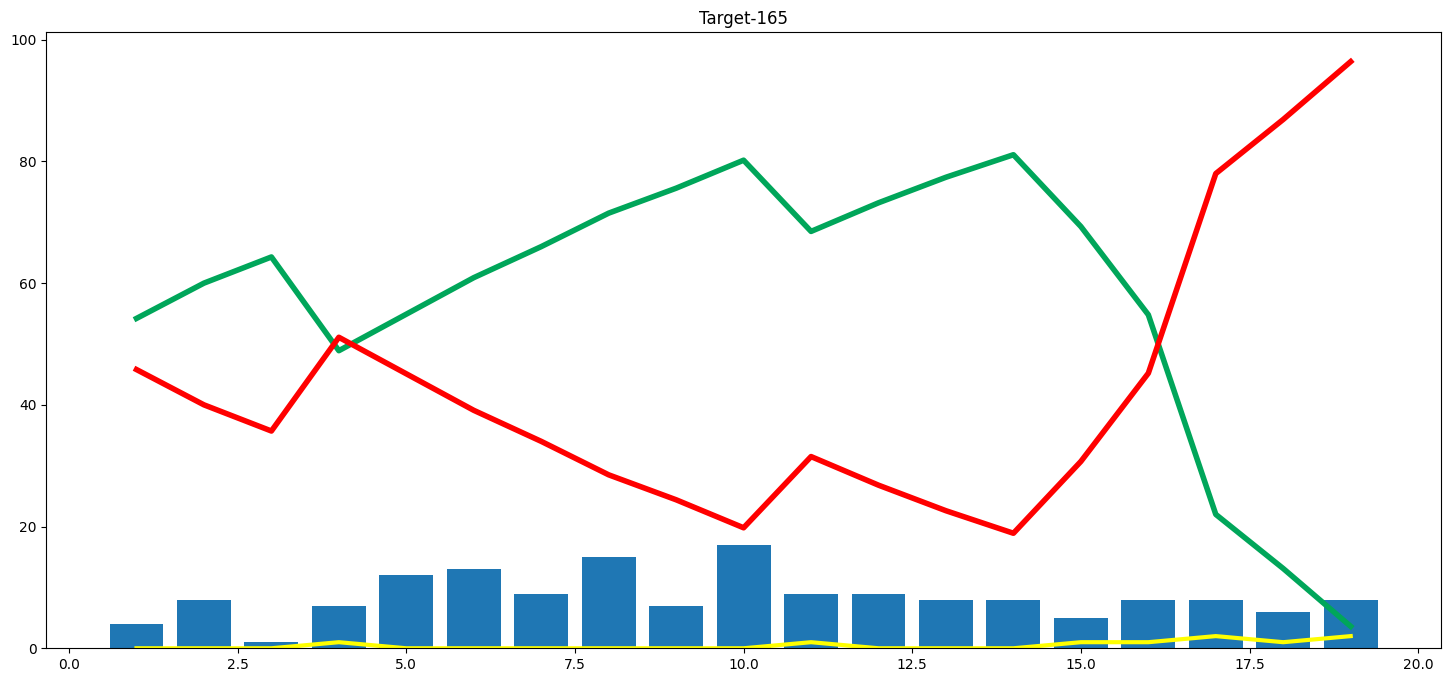

In [45]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [46]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [47]:
pickle.dump(pipe,open('pipe.pkl','wb'))
